In [1]:
import pandas as pd
import numpy as np

from IPython.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio  

import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import warnings

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", 500)
pd.set_option('display.expand_frame_repr', False)  
display(HTML("<style>div.output_scroll { height: 35em; }</style>"))

pio.renderers.default = 'iframe'
pio.templates['ck_template'] = go.layout.Template(
    layout_colorway=px.colors.sequential.Viridis,
    layout_autosize=False,
    layout_width=800,
    layout_height=600,
    layout_font=dict(family="Calibri Light"),
    layout_title_font=dict(family="Calibri"),
    layout_hoverlabel_font=dict(family="Calibri Light")
)

pio.templates.default = 'ck_template+gridon'

In [2]:
df = pd.read_csv('/home/pablo/Downloads/ai-maintenance-dashboard/data/ai4i2020.csv')
df.info(),df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

(None,
    UDI Product ID Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  HDF  PWF  OSF  RNF
 0    1     M14860    M                298.1                    308.6                    1551         42.8                0                0    0    0    0    0    0
 1    2     L47181    L                298.2                    308.7                    1408         46.3                3                0    0    0    0    0    0
 2    3     L47182    L                298.1                    308.5                    1498         49.4                5                0    0    0    0    0    0
 3    4     L47183    L                298.2                    308.6                    1433         39.5                7                0    0    0    0    0    0
 4    5     L47184    L                298.2                    308.7                    1408         40.0                9                0    0    0    0    0   

In [3]:
for column in df.columns:
    try:
        df[column] = df[column].astype(float)
    except:
        pass
    
# Perform a data type conversion
print(df.info(), df.head())  
df_numeric = df.select_dtypes(include=[np.number])
print(df_numeric.describe(include='all').T)   # In addition to describe continuous data, we also describe discrete data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  float64
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  float64
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  float64
 8   Machine failure          10000 non-null  float64
 9   TWF                      10000 non-null  float64
 10  HDF                      10000 non-null  float64
 11  PWF                      10000 non-null  float64
 12  OSF                      10000 non-null  float64
 13  RNF                      10000 non-null  float64
dtypes: float64(12), object(

In [4]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1.0,M14860,M,298.1,308.6,1551.0,42.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,L47181,L,298.2,308.7,1408.0,46.3,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,L47182,L,298.1,308.5,1498.0,49.4,5.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,L47183,L,298.2,308.6,1433.0,39.5,7.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,L47184,L,298.2,308.7,1408.0,40.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df['Power'] = df['Rotational speed [rpm]'] * df['Torque [Nm]']
df['Power wear'] = df['Power'] * df['Tool wear [min]']
df['Temperature difference'] = df['Process temperature [K]'] - df['Air temperature [K]']
df['Temperature power'] = df['Temperature difference'] / df['Power']

df = df[['Air temperature [K]',
         'Process temperature [K]',
         'Rotational speed [rpm]',
         'Torque [Nm]',
         'Tool wear [min]',
         'Power',
         'Power wear',
         'Temperature difference',
         'Temperature power',
         'Type',
         'Machine failure'
         ]]


In [6]:
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Power,Power wear,Temperature difference,Temperature power,Type,Machine failure
0,298.1,308.6,1551.0,42.8,0.0,66382.8,0.0,10.5,0.000158,M,0.0
1,298.2,308.7,1408.0,46.3,3.0,65190.4,195571.2,10.5,0.000161,L,0.0
2,298.1,308.5,1498.0,49.4,5.0,74001.2,370006.0,10.4,0.000141,L,0.0
3,298.2,308.6,1433.0,39.5,7.0,56603.5,396224.5,10.4,0.000184,L,0.0
4,298.2,308.7,1408.0,40.0,9.0,56320.0,506880.0,10.5,0.000186,L,0.0


In [7]:
import numpy as np
import pandas as pd

# One-hot encode Type -> Type_L, Type_M (Type_H is baseline, dropped)
df = pd.get_dummies(
    df,
    columns=['Type'],
    prefix='Type',
    drop_first=True  # gives you Type_L, Type_M
)

# Optional: ensure dummy columns are ints (0/1) not bool
df['Type_L'] = df['Type_L'].astype(int)
df['Type_M'] = df['Type_M'].astype(int)


In [8]:
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Power,Power wear,Temperature difference,Temperature power,Machine failure,Type_L,Type_M
0,298.1,308.6,1551.0,42.8,0.0,66382.8,0.0,10.5,0.000158,0.0,0,1
1,298.2,308.7,1408.0,46.3,3.0,65190.4,195571.2,10.5,0.000161,0.0,1,0
2,298.1,308.5,1498.0,49.4,5.0,74001.2,370006.0,10.4,0.000141,0.0,1,0
3,298.2,308.6,1433.0,39.5,7.0,56603.5,396224.5,10.4,0.000184,0.0,1,0
4,298.2,308.7,1408.0,40.0,9.0,56320.0,506880.0,10.5,0.000186,0.0,1,0


In [9]:
X = df.drop(columns=['Machine failure'])
y = df['Machine failure']


In [10]:
X.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Power,Power wear,Temperature difference,Temperature power,Type_L,Type_M
0,298.1,308.6,1551.0,42.8,0.0,66382.8,0.0,10.5,0.000158,0,1
1,298.2,308.7,1408.0,46.3,3.0,65190.4,195571.2,10.5,0.000161,1,0
2,298.1,308.5,1498.0,49.4,5.0,74001.2,370006.0,10.4,0.000141,1,0
3,298.2,308.6,1433.0,39.5,7.0,56603.5,396224.5,10.4,0.000184,1,0
4,298.2,308.7,1408.0,40.0,9.0,56320.0,506880.0,10.5,0.000186,1,0


In [11]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Machine failure, dtype: float64

In [12]:
df['Machine failure'].value_counts()

Machine failure
0.0    9661
1.0     339
Name: count, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0,
    stratify=y,          # <- important to keep both classes in test
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
    roc_auc_score,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns
import time

model_performance = pd.DataFrame(columns=[
    'Accuracy', 'Recall', 'Precision', 'F1-Score', 'MCC score',
    'ROC-AUC', 'time to train', 'time to predict', 'total time'
])

start = time.time()
rf_model = RandomForestClassifier(
    n_estimators=100,
    n_jobs=-1,
    random_state=0,
    bootstrap=True,
).fit(X_train_scaled, y_train)
end_train = time.time()

y_pred = rf_model.predict(X_test_scaled)
y_proba = rf_model.predict_proba(X_test_scaled)[:, 1]  # for ROC-AUC & dashboard
end_predict = time.time()

accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall    = recall_score(y_test, y_pred, zero_division=0)
f1s       = f1_score(y_test, y_pred, zero_division=0)
MCC       = matthews_corrcoef(y_test, y_pred)
roc_auc   = roc_auc_score(y_test, y_proba)

print("Accuracy: "  + "{:.2%}".format(accuracy),
      "\nRecall: "  + "{:.2%}".format(recall),
      "\nPrecison: "+ "{:.2%}".format(precision),
      "\nF1-Score: "+ "{:.2%}".format(f1s),
      "\nMCC: "     + "{:.2%}".format(MCC),
      "\nROC-AUC: " + "{:.2%}".format(roc_auc),
      "\ntime to train: "   + "{:.2f}".format(end_train - start) + " s",
      "\ntime to predict: " + "{:.2f}".format(end_predict - end_train) + " s",
      "\ntotal: "           + "{:.2f}".format(end_predict - start) + " s"
)

model_performance.loc['Random Forest'] = [
    accuracy, recall, precision, f1s, MCC, roc_auc,
    end_train - start,
    end_predict - end_train,
    end_predict - start
]


Accuracy: 99.15% 
Recall: 80.88% 
Precison: 93.22% 
F1-Score: 86.61% 
MCC: 86.41% 
ROC-AUC: 96.04% 
time to train: 0.45 s 
time to predict: 0.06 s 
total: 0.51 s


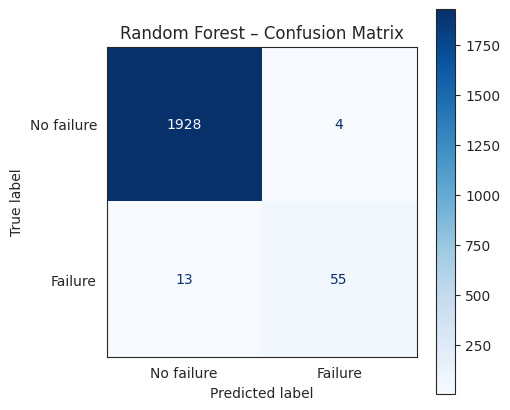

In [15]:
plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['font.size'] = 10
sns.set_style('white')

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    labels=[0, 1],
    display_labels=["No failure", "Failure"],
    cmap="Blues",
)
plt.title("Random Forest – Confusion Matrix")
plt.show()


Gradient Boosting Results
Accuracy: 99.25% 
Recall: 80.88% 
Precison: 96.49% 
F1-Score: 88.00% 
MCC: 87.98% 
ROC-AUC: 96.23% 
time to train: 2.89 s 
time to predict: 0.00 s 
total: 2.90 s


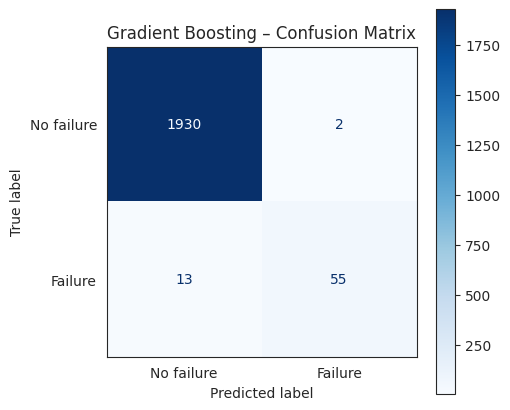

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ----- Train Gradient Boosting -----
start = time.time()
gb_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=0,
).fit(X_train_scaled, y_train)
end_train = time.time()

# Predictions
y_pred = gb_model.predict(X_test_scaled)
probas = gb_model.predict_proba(X_test_scaled)

# Handle the case where only one class is present (rare, but safe)
if probas.shape[1] == 2:
    idx_pos = list(gb_model.classes_).index(1)
    y_proba = probas[:, idx_pos]
else:
    only_class = gb_model.classes_[0]
    y_proba = np.ones(len(X_test_scaled)) if only_class == 1 else np.zeros(len(X_test_scaled))

end_predict = time.time()

# ----- Metrics -----
accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall    = recall_score(y_test, y_pred, zero_division=0)
f1s       = f1_score(y_test, y_pred, zero_division=0)
MCC       = matthews_corrcoef(y_test, y_pred)
roc_auc   = roc_auc_score(y_test, y_proba)

print("Gradient Boosting Results")
print("Accuracy: "  + "{:.2%}".format(accuracy),
      "\nRecall: "  + "{:.2%}".format(recall),
      "\nPrecison: "+ "{:.2%}".format(precision),
      "\nF1-Score: "+ "{:.2%}".format(f1s),
      "\nMCC: "     + "{:.2%}".format(MCC),
      "\nROC-AUC: " + "{:.2%}".format(roc_auc),
      "\ntime to train: "   + "{:.2f}".format(end_train - start) + " s",
      "\ntime to predict: " + "{:.2f}".format(end_predict - end_train) + " s",
      "\ntotal: "           + "{:.2f}".format(end_predict - start) + " s"
)

model_performance.loc['Gradient Boosting'] = [
    accuracy, recall, precision, f1s, MCC, roc_auc,
    end_train - start,
    end_predict - end_train,
    end_predict - start
]

# ----- Confusion Matrix (same style as RF) -----
plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['font.size'] = 10
sns.set_style('white')

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    labels=[0, 1],
    display_labels=["No failure", "Failure"],
    cmap="Blues",
)
plt.title("Gradient Boosting – Confusion Matrix")
plt.show()


Tuned Gradient Boosting Results
Accuracy: 99.30% 
Recall: 82.35% 
Precision:96.55% 
F1-Score: 88.89% 
MCC: 88.83% 
ROC-AUC: 97.28% 
time to train: 4.37 s 
time to predict: 0.01 s 
total: 4.37 s


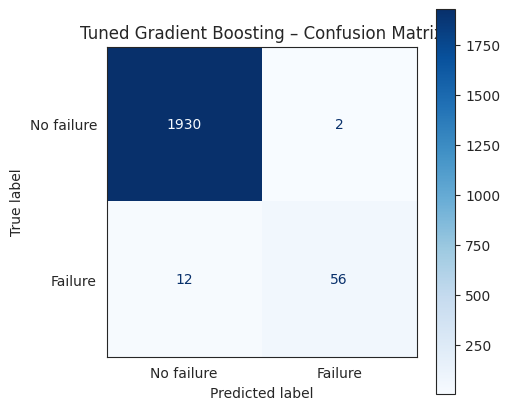


Saved model to maintenance_model.pkl and scaler to scaler.pkl


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

# ----- Train/test split -----
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0,
    stratify=y,
)

# ----- Scaling -----
scaler =  StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# ----- Tuned Gradient Boosting -----
# Manually tuned-style config for tabular binary classification with imbalanced target
gb_tuned = GradientBoostingClassifier(
    n_estimators=400,      # more trees -> better performance, still fast on this dataset
    learning_rate=0.05,   # smaller LR with more estimators
    max_depth=3,          # shallow trees -> less overfitting
    min_samples_split=5,
    min_samples_leaf=10,  # regularization
    subsample=0.8,        # stochastic GB (like shrinkage + bagging)
    max_features=None,    # use all features at each split
    random_state=0,
)

start = time.time()
gb_tuned.fit(X_train_scaled, y_train)
end_train = time.time()

# Predictions
y_pred = gb_tuned.predict(X_test_scaled)
probas = gb_tuned.predict_proba(X_test_scaled)

# Safe handling in case of rare single-class issues (shouldn't happen with full AI4I + stratify)
if probas.shape[1] == 2:
    idx_pos = list(gb_tuned.classes_).index(1)
    y_proba = probas[:, idx_pos]
else:
    only_class = gb_tuned.classes_[0]
    y_proba = np.ones(len(X_test_scaled)) if only_class == 1 else np.zeros(len(X_test_scaled))

end_predict = time.time()

# ----- Metrics -----
accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall    = recall_score(y_test, y_pred, zero_division=0)
f1s       = f1_score(y_test, y_pred, zero_division=0)
MCC       = matthews_corrcoef(y_test, y_pred)
roc_auc   = roc_auc_score(y_test, y_proba)

print("Tuned Gradient Boosting Results")
print("Accuracy: "  + "{:.2%}".format(accuracy),
      "\nRecall: "  + "{:.2%}".format(recall),
      "\nPrecision:"+ "{:.2%}".format(precision),
      "\nF1-Score: "+ "{:.2%}".format(f1s),
      "\nMCC: "     + "{:.2%}".format(MCC),
      "\nROC-AUC: " + "{:.2%}".format(roc_auc),
      "\ntime to train: "   + "{:.2f}".format(end_train - start) + " s",
      "\ntime to predict: " + "{:.2f}".format(end_predict - end_train) + " s",
      "\ntotal: "           + "{:.2f}".format(end_predict - start) + " s"
)

# ----- Optional: log to model_performance -----
try:
    model_performance.loc['GB_Tuned'] = [
        accuracy, recall, precision, f1s, MCC, roc_auc,
        end_train - start,
        end_predict - end_train,
        end_predict - start
    ]
except NameError:
    pass

# ----- Confusion Matrix -----
plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['font.size'] = 10
sns.set_style('white')

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    labels=[0, 1],
    display_labels=["No failure", "Failure"],
    cmap="Blues",
)
plt.title("Tuned Gradient Boosting – Confusion Matrix")
plt.show()

# ----- Save for FastAPI backend -----
joblib.dump(gb_tuned, "maintenance_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("\nSaved model to maintenance_model.pkl and scaler to scaler.pkl")


In [18]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    "n_estimators":     [100, 200, 400, 600],
    "learning_rate":    [0.01, 0.03, 0.05, 0.1],
    "max_depth":        [2, 3, 4],
    "min_samples_split":[2, 5, 10],
    "min_samples_leaf": [5, 10, 20],
    "subsample":        [0.6, 0.8, 1.0],
}

gb_base = GradientBoostingClassifier(random_state=0)

search = RandomizedSearchCV(
    gb_base,
    param_distributions=param_dist,
    n_iter=30,
    scoring="f1",      # or "roc_auc"
    cv=3,
    n_jobs=-1,
    random_state=0,
    verbose=1,
)

search.fit(X_train_scaled, y_train)

print("Best params:", search.best_params_)
print("Best CV score:", search.best_score_)

gb_best = search.best_estimator_


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best params: {'subsample': 1.0, 'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_depth': 4, 'learning_rate': 0.1}
Best CV score: 0.8519742414746788


Tuned Gradient Boosting Results
Accuracy: 99.30% 
Recall: 82.35% 
Precision:96.55% 
F1-Score: 88.89% 
MCC: 88.83% 
ROC-AUC: 97.28% 
time to train: 7.66 s 
time to predict: 0.01 s 
total: 7.67 s


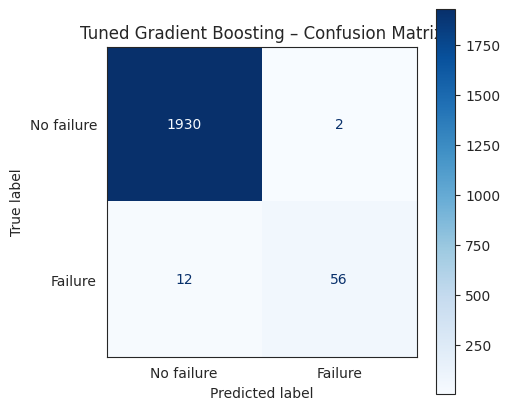


Saved model to maintenance_model.pkl and scaler to scaler.pkl


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

# ----- Train/test split -----
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0,
    stratify=y,
)

# ----- Scaling -----
scaler =  StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# ----- Tuned Gradient Boosting -----
# Manually tuned-style config for tabular binary classification with imbalanced target

start = time.time()
gb_best.fit(X_train_scaled, y_train)
end_train = time.time()

# Predictions
y_pred = gb_tuned.predict(X_test_scaled)
probas = gb_tuned.predict_proba(X_test_scaled)

# Safe handling in case of rare single-class issues (shouldn't happen with full AI4I + stratify)
if probas.shape[1] == 2:
    idx_pos = list(gb_tuned.classes_).index(1)
    y_proba = probas[:, idx_pos]
else:
    only_class = gb_tuned.classes_[0]
    y_proba = np.ones(len(X_test_scaled)) if only_class == 1 else np.zeros(len(X_test_scaled))

end_predict = time.time()

# ----- Metrics -----
accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall    = recall_score(y_test, y_pred, zero_division=0)
f1s       = f1_score(y_test, y_pred, zero_division=0)
MCC       = matthews_corrcoef(y_test, y_pred)
roc_auc   = roc_auc_score(y_test, y_proba)

print("Tuned Gradient Boosting Results")
print("Accuracy: "  + "{:.2%}".format(accuracy),
      "\nRecall: "  + "{:.2%}".format(recall),
      "\nPrecision:"+ "{:.2%}".format(precision),
      "\nF1-Score: "+ "{:.2%}".format(f1s),
      "\nMCC: "     + "{:.2%}".format(MCC),
      "\nROC-AUC: " + "{:.2%}".format(roc_auc),
      "\ntime to train: "   + "{:.2f}".format(end_train - start) + " s",
      "\ntime to predict: " + "{:.2f}".format(end_predict - end_train) + " s",
      "\ntotal: "           + "{:.2f}".format(end_predict - start) + " s"
)

# ----- Optional: log to model_performance -----
try:
    model_performance.loc['GB_Tuned'] = [
        accuracy, recall, precision, f1s, MCC, roc_auc,
        end_train - start,
        end_predict - end_train,
        end_predict - start
    ]
except NameError:
    pass

# ----- Confusion Matrix -----
plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['font.size'] = 10
sns.set_style('white')

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    labels=[0, 1],
    display_labels=["No failure", "Failure"],
    cmap="Blues",
)
plt.title("Tuned Gradient Boosting – Confusion Matrix")
plt.show()

# ----- Save for FastAPI backend -----
joblib.dump(gb_tuned, "maintenance_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("\nSaved model to maintenance_model.pkl and scaler to scaler.pkl")
